# Machine Learning - Logistic Regression

Dataset we will be working with the Titanic Data Set from 'Kaggle'. 

I will be trying to predict a classification- survival or deceased.

***used a "semi-cleaned" version of the Titanic data set, to use the data set hosted directly on Kaggle, will need to do some additional cleaning.***

In [1]:
# imorting our libraries 

import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

In [3]:
# import our dataset 

ttrain = pd.read_csv('titanic_train.csv')

In [4]:
ttrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
ttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
ttrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
ttrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### we will try to check our dataset for any missing data

In [8]:
ttrain.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

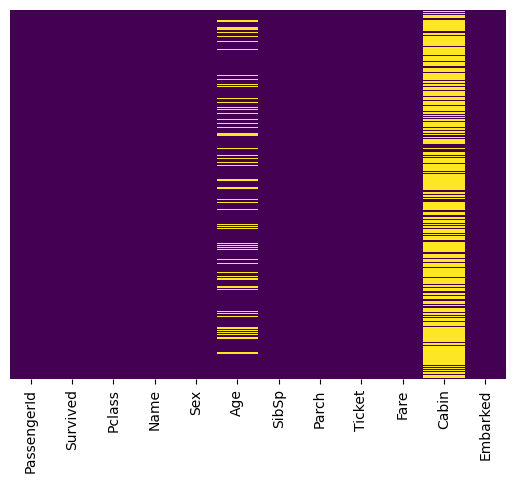

In [9]:
sns.heatmap(ttrain.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we are missing some age info, missing a lot of cabin info as well.

In [10]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

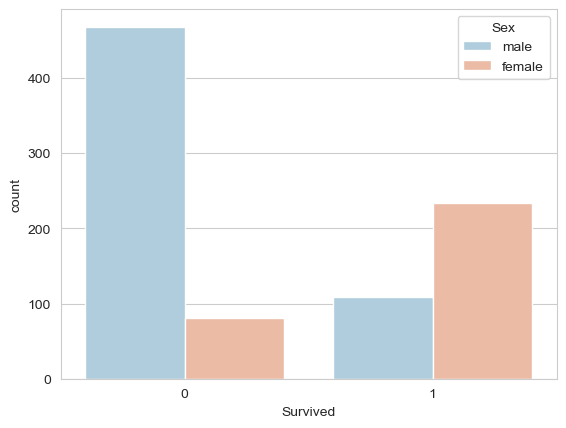

In [11]:
sns.countplot (x= 'Survived', data=ttrain, hue ='Sex',
              palette ='RdBu_r')

we can notice here, that most of the people who did not survive were males, while females are 2/3 of survivors 

<Axes: xlabel='Survived', ylabel='count'>

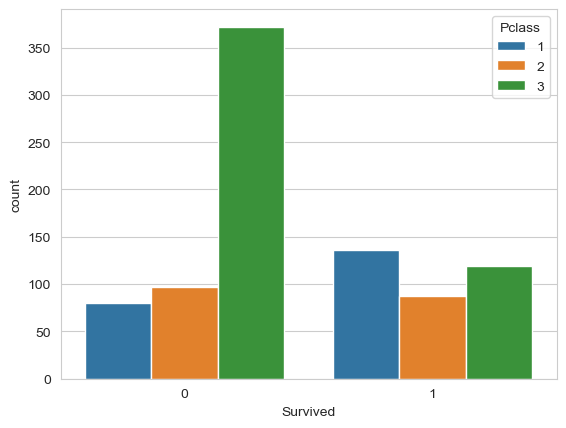

In [12]:
sns.countplot (x= 'Survived', data=ttrain, hue ='Pclass')

after exploring more with our data, we can tell most of people who did not survive were from the 3rd class, while people from 1st class were the majority of the survivors 

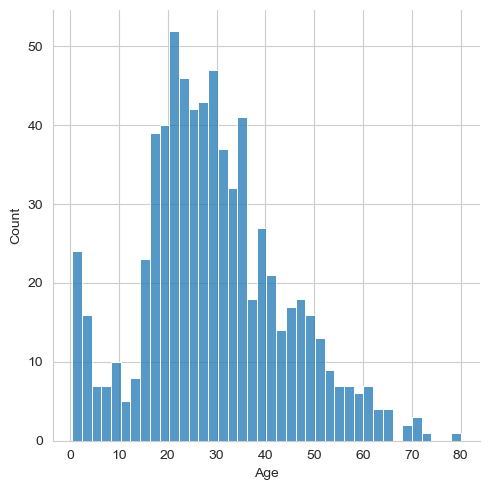

In [13]:
sns.displot (ttrain['Age'].dropna(), kde= False, bins = 40)

here we can notice the age range and the number of passengers of each range

In [14]:
ttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


let's dive more deeply into our dataset, and I will check the SibSp, which shows if passengers have any siblings or spouses accompany them on this trip

<Axes: xlabel='SibSp', ylabel='count'>

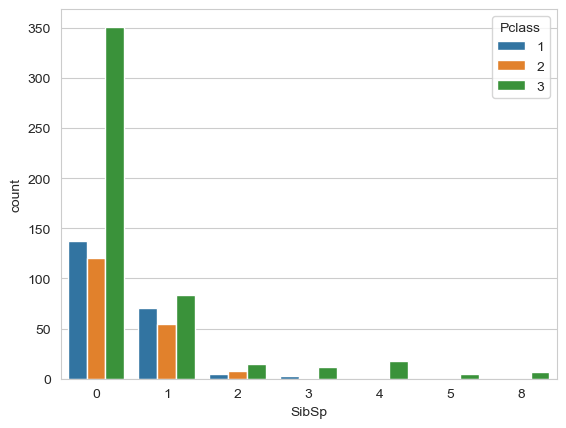

In [15]:
sns.countplot(x= 'SibSp', data=ttrain, hue= 'Pclass')

we can notice, most of people were single on this trip
we can notice a segnificant amount of people almost eqully distributed among differnet classes were having a spouse with them, and more of 3rd class who have more family memeber with them as if the whole family is migrating together 

<Axes: >

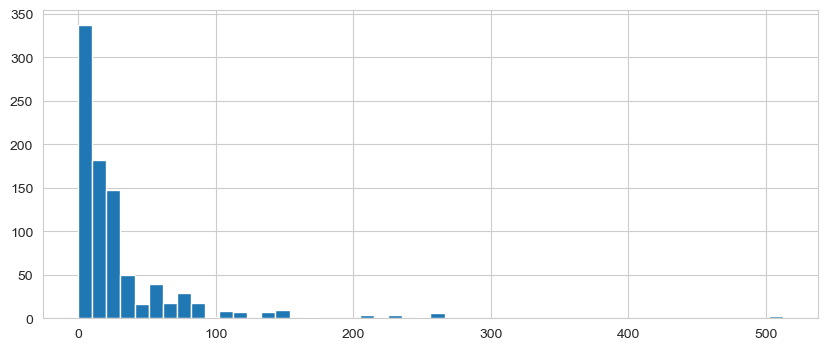

In [16]:
ttrain['Fare'].hist(bins=50, figsize= (10,4))

it shows that most prices were low, which is not surprising since we already noticed in previous plots that most of the passengers were in 3rd class

In [17]:
# show same results with an interactive plot

import cufflinks as cf

In [18]:
cf.go_offline ()

In [19]:
ttrain['Fare'].iplot(kind='hist',bins=50,color='green')

 ### Data Cleaning

since we already know we have some missing data, we will work on cleaning our dataset and fill in some of the missing values

<Figure size 1000x400 with 0 Axes>

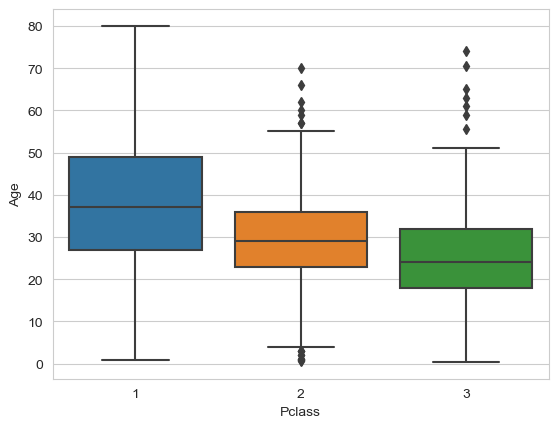

<Figure size 1000x400 with 0 Axes>

In [20]:
sns.boxplot(x='Pclass', y='Age', data=ttrain)
plt.figure (figsize= (10,4))

checking this plot we can tell the mean age of 1st class passengers is higher than the rest, while the lowest age mean is among the 3rd class passengers

we can create a function to fill in the mean age of the missing data in each passenger's class

In [21]:
def fillin_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [22]:
ttrain['Age'] = ttrain[['Age','Pclass']].apply(fillin_age,axis=1)

<Axes: >

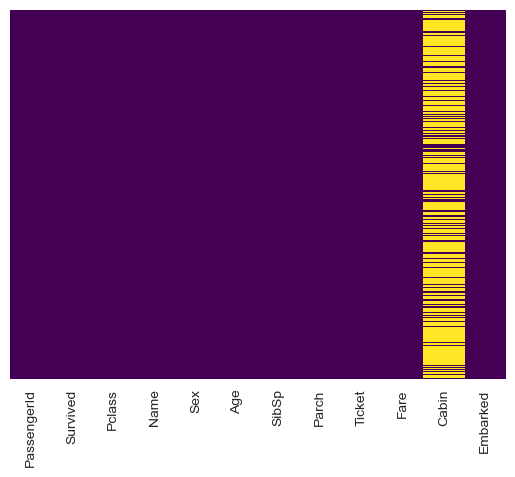

In [23]:
sns.heatmap(ttrain.isnull(),yticklabels=False,cbar=False,cmap='viridis')

now we notice that the age gaps have been filed in due to the function we created

In [24]:
ttrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


our new problem is the cabin column, and here not knowing the cabin number of a passenger will not change that the passenger was on board so we will drop the cabin column

In [25]:
# we will drop every missing values since we already dealt with Age column

if 'Cabin' in ttrain.columns:
    ttrain.drop('Cabin', axis=1, inplace=True)

In [26]:
ttrain.dropna(inplace=True)

<Axes: >

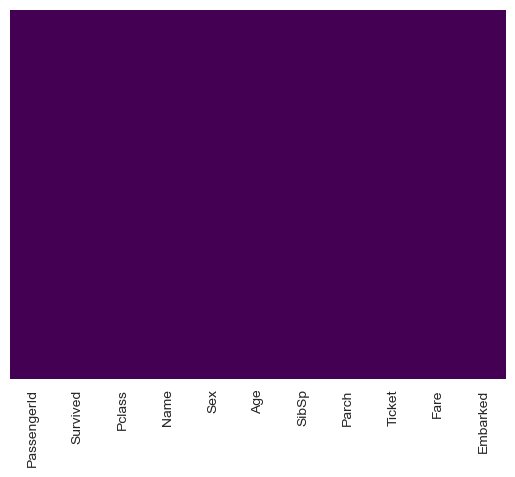

In [27]:
sns.heatmap(ttrain.isnull(),yticklabels=False,cbar=False,cmap='viridis')

now we see there is no missing data after the cleansing we did

### Converting Categorical Features¶

will convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [28]:
ttrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [29]:
ttrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [30]:
# changing the values of the following columns into numerical data

sex = pd.get_dummies(ttrain['Sex'],drop_first=True)
embark = pd.get_dummies(ttrain['Embarked'],drop_first=True)

In [31]:
# drop columns we will not need, and will not work as numerical data

if all(col in ttrain.columns for col in ['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId']):
    ttrain.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [32]:
# to add our modified categorical features 

ttrain = pd.concat([ttrain,sex,embark],axis=1)

In [33]:
ttrain

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


comparing our data calling from 2 previous calls, this is the type of data we will need (Numerical) to train in our model. 

#### N: Note that Pclass is also a categorical column and we can use pd.get_dummies categorical features 

so we might try to use our data when Pclass is just a column or when it is used as a categorical features

### Building a Logistic Regression model

will need to train test split our data, so here we go!


In [34]:
from sklearn.model_selection import train_test_split 

In [35]:
X = ttrain.drop('Survived', axis=1)
y = ttrain['Survived']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

after train and test the data, now we have to predict by creating a model Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmod = LogisticRegression()

In [39]:
# train our model

logmod.fit(X_train, y_train)

/Users/alex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [40]:
# now let's predict using our model 

predictions = logmod.predict(X_test)

Let's move on to evaluate our model

### Evaluation

In [41]:
from sklearn.metrics import classification_report

classification report usually will indicate our accuracy, precision, and recall values

In [42]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



that is one way to evaluate or data, on other hand we can use the confusion matrix to show other useful indicators

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
print (confusion_matrix(y_test, predictions))

[[138  29]
 [ 25  75]]


here are some information we could have retreaved from our data, and they might reveal more info to help us with this project like:

- Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
- Maybe the Cabin letter could be a feature
- Is there any info you can get from the ticket?

### - - - - The end - - - -